<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Problem 1 - Food Classification Model (Individual)</h2><h3>AY2025 Semester</h3></th>
    </tr>
</table>

# Table of Contents

# 1. [Overview](#1)
# 2. [Data Preprocessing and Data Loading](#2)
## 2.1 [Data Loading](#2.1)
# 3. [Develop the Image Classification Models](#3)
## 3.1 [Baseline Model](#3.1)
## 3.2 [Scaled Up Model](#3.2)
## 3.3 [Fine-Tuned Model](#3.3)
# 4. [Evaluate tuned model using Test images](#4)
# 5. [Use the Model to perform classification](#5)
# 6. [Summary](#6)

# 1. Overview <a id = "1"></a>

In this assignment, the problem is to classify food images into 10 specific types. This is challenging because the food images can be very different in presentation, lighting, and angle. Not only that, some food types may look very similar, making it difficult for a model to notice the difference between them without learning strong and meaningful patterns.
The objective of this assignment is to build a deep learning model that can accurately classify food images into the correct category among the 10 assigned classes. The model should be trained using labelled data and then tested on unseen images to assess how well it generalises. In the end, the model should also be able to handle real world data by classifying food images downloaded from the internet.
To approach this problem, I have followed the universal machine learning workflow to developed the model. This begins with me starting with a baseline model which is a good starting point to test if the model is able to learn from the patterns with not so much tuning. After that. the model is scaled up to allow for more learning. Lastly, the model is fine-tuned to remove the overfitting. Throughout the process, I would carefully observe the model performances with metrics like accuracy and loss for both the training and validation data, and make adjustments to improve the results. I would be testing and applying different techniques like adjusting the hyperparameters or applying regularisation to improve the model.
In addition to training the model, I also evaluated its performance on a test set that was not seen during training. This ensures that the model is not just memorising the training data but is capable of generalising to new unseen images. Finally, I applied the model to real world images to test its actual performance.

# 2. Data Preprocessing and Data Loading <a id = "2"></a>

Before building the image classification model, the first step was to prepare and load the data into my Jupyter Notebook. The dataset contains 101 categories of food images with 1000 images for each food category. For this assignment, I was provided with a file that listed the 10 specific food types I needed to be working with.
Using the provided Image_Preprocessing.ipynb file, I extracted only the images related to my 10 assigned classes. This file also helped automate the splitting of images into three sets which are 750 for training images, 200 for validation images and 50 for testing images for each class. This gave me a total of 10,000 images, evenly distributed across the three datasets. This ensured that I had a balanced and consistent dataset across all food categories. 
All images were resized to 150x150 pixels, which is the recommended size that balances image detail with training efficiency. This resizing step ensures that all input data has the same shape, which is required when feeding it into the model. I directly loaded the image data for train, test and validation from the local directory paths of the respective folders that was split earlier.
This preprocessing step ensures that the data is clean, correctly formatted, and ready for model training.

In [3]:
# Import the Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

## 2.1 Data Loading  <a id = "2.1"></a>

In [6]:
train_dir = 'C:\\Users\\Ashley\\Documents\\School\\1.3\\DL\\DL Assignment\\train\\'
validation_dir = 'C:\\Users\\Ashley\\Documents\\School\\1.3\\DL\\DL Assignment\\validation\\'
test_dir = 'C:\\Users\\Ashley\\Documents\\School\\1.3\\DL\\DL Assignment\\test\\'

In [8]:
from tensorflow.keras.applications import InceptionV3
img_size = 150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


In [9]:
conv_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


# 3. Develop the Image Classification Models <a id = "3"></a>

To build an effective image classification model to assign the 10 food classes, I followed the universal machine learning workflow. I started with a simple baseline model, followed by scaling it up and then applying regularisation to fine-tune and improve the generalisation. I have chosen the pre-trained convolutional neural network InceptionV3 as it is fast and efficient compared to older models.

## 3.1 Baseline Model <a id = "3.1"></a>

I began with a baseline model with the convolutional base kept frozen to prevent the pre-trained weights from being updated during the training. On top of the frozen base, I added GlobalAveragePooling2D layer to reduce the dimensionality into a single vector. Instead of flattening all the features into one long vector, this layer just takes the average of each feature. Next, I added a Dense layer with 8 neurons and ReLU activation. I only used 8 neurons to test the basic performance first and prevent overfitting. Lastly, I have an output layer with 10 neurons, one for each food class. Softmax is used for multi-class classification to outuput probabilities that sum to 1. I used RMSprop as the optimiser because it works well witht the models that uses pre-trained networks and stabilises the training. The learning rate of 1e-4 is small enough for it to learn carefully without changing the weights too much. Since this is a multi-class classification problem, I used categorical crossentropy loss. I trained for 30 epochs to give the model enough time to learn without overfitting too early. This model was kept simple to establish a baseline performance. By freezing the convolutional base, the training was faster and the model could just focus on learning without overfitting early on.

In [10]:
# Build the Model

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# Train the Model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=1)

C:\Users\Ashley\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 200ms/step - acc: 0.0959 - loss: 2.3373 - val_acc: 0.1820 - val_loss: 2.1375
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 185ms/step - acc: 0.1801 - loss: 2.0970 - val_acc: 0.2490 - val_loss: 1.9332
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 190ms/step - acc: 0.2561 - loss: 1.9250 - val_acc: 0.3235 - val_loss: 1.7752
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - acc: 0.3504 - loss: 1.7599 - val_acc: 0.4020 - val_loss: 1.6539
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 185ms/step - acc: 0.4069 - loss: 1.6486 - val_acc: 0.4305 - val_loss: 1.5767
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 190ms/step - acc: 0.4426 - loss: 1.5807 - val_acc: 0.4780 - val_loss: 1.4805
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 191ms/step - acc: 0.4801 - loss: 1.4839 - val_acc: 0.5235 - val_loss: 1.4001
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 194ms/step - acc: 0.5328 - loss: 1.4101 - val_acc: 0.5655 - val_loss: 1.3416
Epoch 9/30
469/469 ━━━━━━━━━━━━

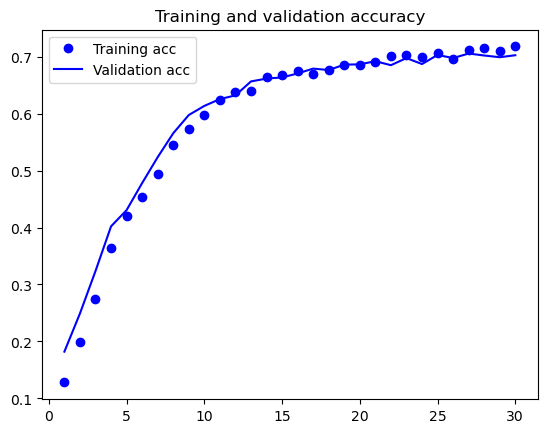

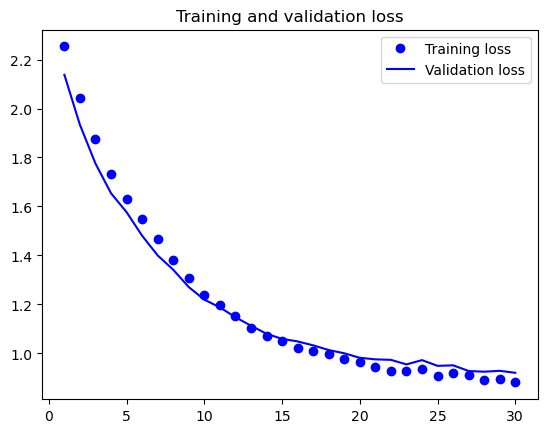

In [12]:
# Plot the Training and Validation Accuracy & Loss Scores

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The training and validation accuracy curve and the training and validation loss curve shows that the baseline model was able to learn gradually and improve in the performance over time. The training accuracy slowly increase until 0.7 while the validation accuracy also slowly increase until 0.7. This suggests that the model was learning meaningful patterns without overfitting. For the training and validation loss graph, the training loss and validation loss decreased consistently to below 1.0 through the 30 epoch run. This shows that the model was generalising quite well and was not overfitting. These graphs together shows that the baseline model was a good starting point. Although the accuracy is not that high yet, the smooth learning curves and small gap between training and validation suggest that the model still has room to scale and improve. This confirmed to me that I can move on to a more complex model next. 

In [13]:
# Save the Model
model.save('food_model_1.h5')

## 3.2 Scaled Up Model <a id = "3.2"></a>

So after I made the baseline, I scaled up the model to improve its learning capacity. To do this, I unfroze the convolutional base. Thus, InceptionV3 can now update the pre-trained weights based on the food dataset. I also increased the size of the Dense layer from 8 to 16 neurons so that the model has more capacity to learn. The model is thus able to learn more patterns and understand more detail in the data. From the baseline, I saw that the model could learn smoothly with 1e-4. Since I only increased the Dense layer by abit and unfreezed the convolutional base, I decided to not change the learning rate to avoid sudden big changes.

In [15]:
# Build the Model

model = models.Sequential()

conv_base.trainable = True
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# Train the Model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 214s 409ms/step - acc: 0.4980 - loss: 1.5267 - val_acc: 0.7865 - val_loss: 0.9557
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 414ms/step - acc: 0.7932 - loss: 0.7087 - val_acc: 0.8405 - val_loss: 0.7844
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 187s 399ms/step - acc: 0.8432 - loss: 0.5361 - val_acc: 0.8330 - val_loss: 0.9659
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 436ms/step - acc: 0.8655 - loss: 0.4392 - val_acc: 0.8385 - val_loss: 0.8678
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 437ms/step - acc: 0.8917 - loss: 0.3581 - val_acc: 0.8375 - val_loss: 0.9339
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 433ms/step - acc: 0.8999 - loss: 0.3221 - val_acc: 0.8435 - val_loss: 0.8302
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 408ms/step - acc: 0.9131 - loss: 0.2773 - val_acc: 0.8485 - val_loss: 0.7972
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 419ms/step - acc: 0.9163 - loss: 0.2793 - val_acc: 0.8515 - val_loss: 0.7800
Epoch 9/30
469/469 ━━━━━

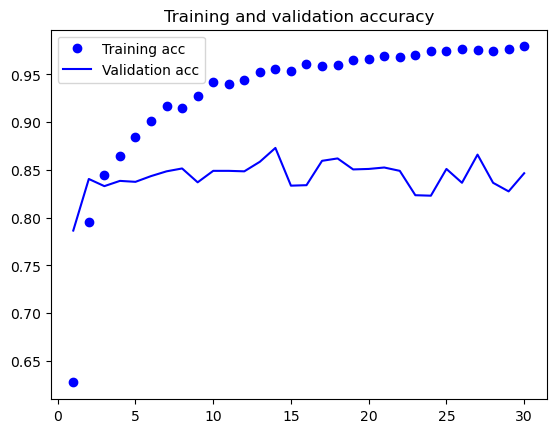

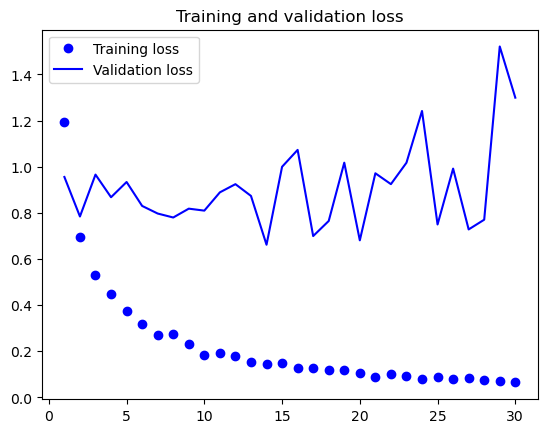

In [17]:
# Plot the Training and Validation Accuracy & Loss Scores

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After scaling up the model, the training and validation performance changed by quite a lot. The training accuracy increase very fast all the way to 0.98 by the end of the 30 epoch run. This shows that the model was learning very well from the training data. However, the validation accuracy reached around 0.85 very early in the run and fluctuated abit yet maintaining. Since there was no improvement for the validation accuracy, this suggests that while the model can fit the training data very well, it could not generalise well to the validation set. Looking at the training and validation loss graphs, the training loss decreased by alot until almost zero. However, the validation loss fluctuated alot while increasing. This shows that the model is overfitting and has memorised too much of the training data and unable to perform well on unseen data. This shows that the model had too much learning capacity and needs regularisation to reduce the overfitting and improve its generalisation on unseen data.

In [18]:
# Save the Model
model.save('food_model_2.h5')

## 3.3 Fine-Tuned Model <a id = "3.3"></a>

After observing the overfitting in the scaled up model, I will fine-tune the model now by applying regularisation techniques and reducing the learning rate. I kept the convolutional base unfrozen to continue fine-tuning the InceptionV3 layers. First, I applied L2 regularisation of 0.001 to the Dense layer to discourage the model from having too large weights and help prevent it from depending too much on any feature. Next, I added a dropout layer with a dropout rate of 0.4. This forces the model to learn more robust and general features, instead of relying too much on some of the neurons. Lastly, I reduced the learning rate from 1e-4 to 1e-5 as I dont want to make large or sudden changes to the pre-trained weights. Lowering the learning rate help my model to adjust slowly and carefully which is important for fine-tuning. I kept the Dense layer size at 16 neurons as I already added regularisation. These were made to make my model more stable and better at generalising.

In [20]:
# Build the Model

model = models.Sequential()

conv_base.trainable = True
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
# Train the Model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 271s 527ms/step - acc: 0.3637 - loss: 1.8550 - val_acc: 0.7615 - val_loss: 0.8919
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 235s 501ms/step - acc: 0.6722 - loss: 0.9683 - val_acc: 0.8035 - val_loss: 0.6734
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 243s 518ms/step - acc: 0.7266 - loss: 0.7851 - val_acc: 0.8075 - val_loss: 0.6339
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 236s 503ms/step - acc: 0.7463 - loss: 0.7020 - val_acc: 0.8135 - val_loss: 0.6207
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 239s 509ms/step - acc: 0.7594 - loss: 0.6577 - val_acc: 0.8125 - val_loss: 0.6068
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 237s 504ms/step - acc: 0.7612 - loss: 0.6231 - val_acc: 0.8165 - val_loss: 0.6018
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 251s 535ms/step - acc: 0.7745 - loss: 0.5884 - val_acc: 0.8120 - val_loss: 0.6059
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 238s 508ms/step - acc: 0.7798 - loss: 0.5525 - val_acc: 0.8120 - val_loss: 0.6042
Epoch 9/30
469/469 ━━━━━

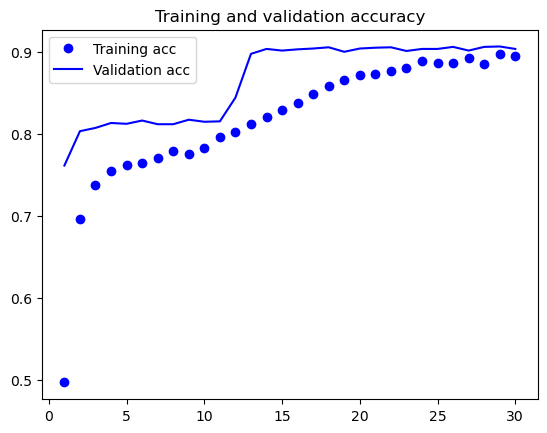

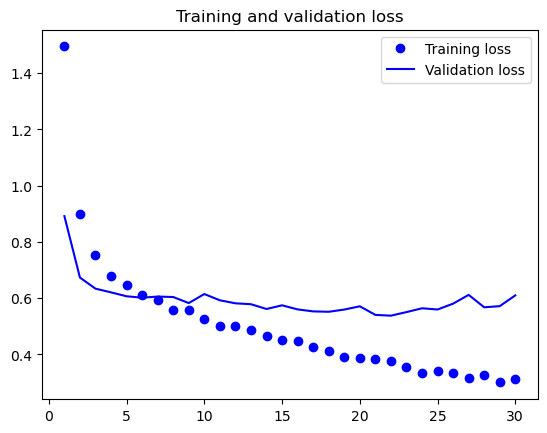

In [22]:
# Plot the Training and Validation Accuracy & Loss Scores

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The training and validation accuracy curves and training and validation loss curves show that the fine-tuned model was able to learn in a stable and balanced way. There are good improvements compared to the scaled up model. The training accuracy slowly increased till it reached 0.89 at the end of the 30 epoch run. The validation accuracy increased quite fast earlier on and then reached 0.9 around epoch 14,. After that it just maintained around 0.9. Through the training, the gap between the training accuracy and the validation accuracy remained quite small. This shopws that the model was not overfitting and was generalising well to unseen data. Looking at the loss graph, the training loss decreased slowly until 0.3 while the validation loss decreased until around epoch 14 where it maintained around 0.6. This suggests that the regularisation techniques was effective and the model did not memorise the training data. Overall, these graphs show that the fine-tuned model had the best generalisation and was able to learn ftom the training data well while also doing well on the validation data. 

In [23]:
# Save the Model
model.save('food_model_3.h5')

# 4. Evaluate tuned model using Test images <a id = "4"></a>

After building the mdoels and completing the training and validation, I evaluated the 3 models using the same test dataset to see and measure their generalisation performance. This is an important step to measure how well the models would perform on data they had never seen before, simulating the real world. Out of the 3, the final fine-tuned model got the highest test accuracy which showed that the tuning and changes made were effective. This suggests that the fine-tuned model was not just memorising the data but also learning the patterns. The fine-tuned model achieved a test accuracy of 0.892 which is the highest. On the other hand, the baseline model had a test accuracy of 0.678 and the scaled up model had one of 0.836. This shows that the model was not only able to perform well on training and validation data but also generalise well to new unseen data. This makes it more reliable for real life applications. The test loss for the fine-tuned model was 0.7865 which was the lowest of the 3 models, with the baseline model having a loss of 0.9602 and the scaled up model having a loss of 1.5447. This consistent performance across validation data as well as test data also showed that the model was not overly tuned to the validation data. The L2 regularisation and dropout with a lower learning rate all helped in improving the generalisation and reducing the overfitting. Thus, the testing results confirmed that the fine-tuned model was the most effective overall. It had the highest accuracy while having the lowest loss on the test data. This shows that it was able to learn from the training data while generalising well to the unseeen images. Thus, the fine-tuned model is well optimised and can be used quite reliably on future, new unseen data.

In [18]:
model1 = keras.models.load_model('food_model_1.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='categorical')

test_loss, test_acc = model1.evaluate(test_generator)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - acc: 0.6720 - loss: 0.9602
test acc: 0.6779999732971191


In [19]:
model2 = keras.models.load_model('food_model_2.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate(test_generator)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - acc: 0.8448 - loss: 1.5447
test acc: 0.8360000252723694


In [20]:
model3 = keras.models.load_model('food_model_3.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode='categorical')

test_loss, test_acc = model3.evaluate(test_generator)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - acc: 0.8758 - loss: 0.7865
test acc: 0.8920000195503235


In [24]:
# Save the best model


model3.save('food_model_best.h5')

# 5. Use the Model to perform classification <a id = "5"></a>

After testing the model and choosing the best one, I used the best final fine-tuned model to test on several real life food images that I have chosed and downloaded. This would show how the model could be used in a real life scenario. First, I tested the model with a picture of a clear example of a falafel. The model correctly predicted that it was a falafel with a 1.0 confidence. This suggests that the model was very confident and had learned strong features of a falafel. Next I used 2 oysters to test the model, one that is a clean raw oyster while the other is a grilled oyster with some garnish on it. The model succesfully predicted thast both were oysters anmd was confident in predicting the raw oyster and less confident of only 0.326 for the grilled oyster. This could be due to the cheese and garnish which made the image different compared to raw oysters. Next I used a pancake with some fruits to test the model to see if the fruits would throw the prediction off for the model. It correctly predicted that it was pancakes and had a confidence of 0.9992 showing that it learnt all the pancake features from the stack, heights, layers and even the toppings. Lastly, I tested the model with a chocolate pancake to see if the difference in colour or flavour would throw off the model. It did not predict it correctly and gave a prediction of cannoli. This is probably due to the unusual presentation which may be simialr to a cannoli. These predictions show that the model can be successfully applied to real-life images with high accuracy and confidence in most cases. It was able to correctly classify 4 out of 5 images, and even in the one mistake, the image was very unusual and rare.

In [27]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [33]:
# Load the food list (in alphabetical order)
with open('Food_list/35.txt', 'r') as f: 
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['cannoli', 'caprese_salad', 'creme_brulee', 'eggs_benedict', 'falafel', 'onion_rings', 'oysters', 'pancakes', 'seaweed_salad', 'shrimp_and_grits']


In [35]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

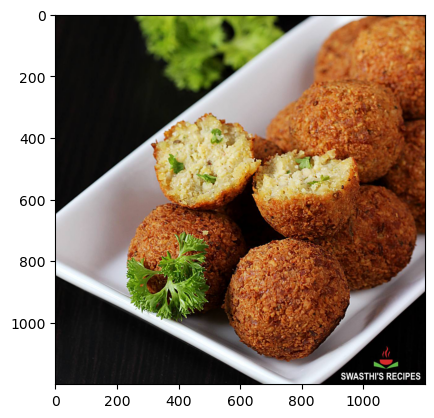

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The prediction is:  falafel 

         cannoli  caprese_salad  creme_brulee  eggs_benedict  falafel  \
0  6.010737e-17   2.033551e-07  5.425008e-14   6.721924e-11      1.0   

    onion_rings       oysters      pancakes  seaweed_salad  shrimp_and_grits  
0  2.537504e-11  2.635208e-18  8.341534e-13   1.985795e-16      1.282316e-17  


In [41]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Falafel.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

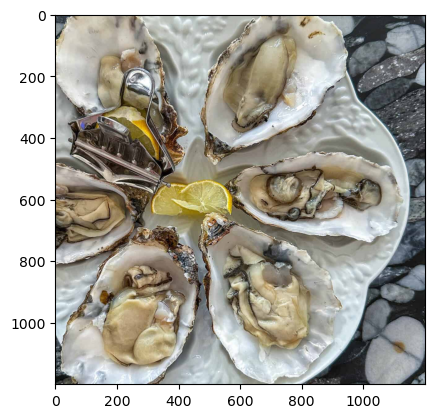

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The prediction is:  oysters 

         cannoli  caprese_salad  creme_brulee  eggs_benedict       falafel  \
0  3.039161e-08       0.000011  4.742905e-08   5.488951e-07  3.439954e-08   

    onion_rings   oysters      pancakes  seaweed_salad  shrimp_and_grits  
0  2.028078e-08  0.999985  1.426163e-08       0.000003      8.127455e-10  


In [45]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Oyster.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

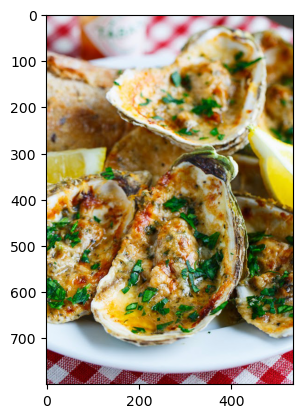

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The prediction is:  oysters 

     cannoli  caprese_salad  creme_brulee  eggs_benedict   falafel  \
0  0.039666       0.190488      0.018358        0.02638  0.123525   

   onion_rings   oysters  pancakes  seaweed_salad  shrimp_and_grits  
0     0.021478  0.326384  0.057007       0.155592          0.041122  


In [122]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Grilled Oyster.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

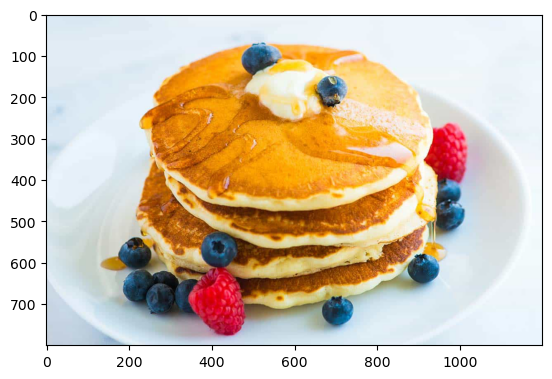

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The prediction is:  pancakes 

         cannoli  caprese_salad  creme_brulee  eggs_benedict       falafel  \
0  1.934452e-12       0.000006  7.214259e-10   2.461536e-07  2.371484e-07   

   onion_rings       oysters  pancakes  seaweed_salad  shrimp_and_grits  
0     0.000012  8.358440e-15  0.999241       0.000741      3.937231e-11  


In [43]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Pancake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

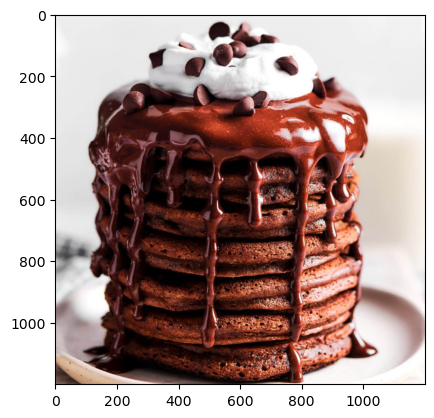

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
The prediction is:  cannoli 

     cannoli  caprese_salad  creme_brulee  eggs_benedict   falafel  \
0  0.577714       0.059722      0.000706       0.007972  0.093629   

   onion_rings   oysters  pancakes  seaweed_salad  shrimp_and_grits  
0     0.193114  0.013039  0.018751       0.029012           0.00634  


In [118]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Chocolate Pancake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

# 6. Summary <a id = "6"></a>

In summary, I have developed an image classification model using a pre-trained convolutional neural network that is InceptionV3 to classify food images into 10 categories. The baseline model showed steady learning with no signs of overfitting but the accuracy was not so high due to it being not so complex. The scaled up model achieved a very high training accuracy but overfitted. It did not generalise well to the validation data. The final fine-tuned model solved this with the reugularisations applied to achieve a test accuracy of 0.892 and a test loss of 0.7865. When using real life food images, the fine-tuned model correctly classified 4 out of the 5 images, only incorrectly classifying one image which was presented very unusually and unlike the original food. This shows that the model performs well on clean examples but still can be confused and tricked by different presentation. To further improve the model, I suggest that the model could be trained with more diverse data with even more diffrent angles, styles, lighting or ingredients. More layers or different pre-trained convolutional neural network could be explored to experiment for gain in accuracy. Overall, this has showed that careful tuning can result in well performance of the model for both the provided dataset and the real world food images.